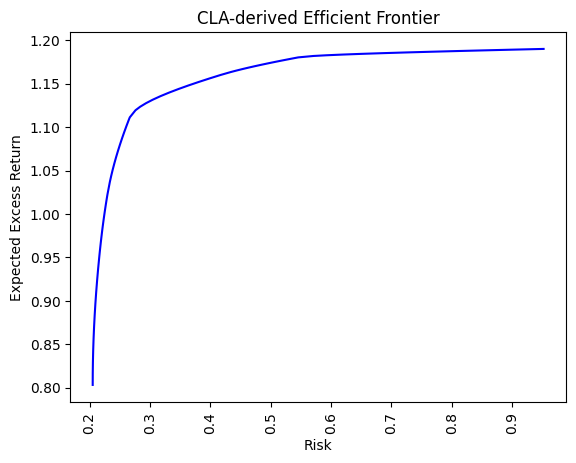

4.45353347664641
[[0.03696858]
 [0.02690084]
 [0.09494243]
 [0.12577595]
 [0.07674608]
 [0.21935567]
 [0.0299871 ]
 [0.03596328]
 [0.06134984]
 [0.29201023]]


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from cla_implement import CLA

def plot2D(x, y, xLabel='', yLabel='', title='', pathChart=None):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    ax.set_title(title)
    plt.xticks(rotation=90)
    fig.tight_layout()
    if pathChart is None:
        plt.show()
    else:
        fig.savefig(pathChart, bbox_inches='tight', dpi=200)
    plt.close(fig)

# 1) Path
path = './CLA_Data.csv'

# 2) Load data
data = np.genfromtxt(path, delimiter=',', skip_header=1)  # as numpy array
mean  = data[0]      # shape (n,)
lB    = data[1]      # shape (n,)
uB    = data[2]      # shape (n,)
covar = data[3:]     # shape (n, n)

# 3) Invoke object
cla = CLA(mean, covar, lB, uB)

# 4) Plot frontier
mu, sigma, weights = cla.get_efficient_frontiers(max(100, len(cla.weights) * 10))
plot2D(sigma, mu, 'Risk', 'Expected Excess Return', 'CLA-derived Efficient Frontier')

# 5) Get Maximum Sharpe ratio portfolio
w_sr, sr = cla.get_max_sharpe_port()
print("Max Sharpe:", sr)

# 6) Get Minimum Variance portfolio
w_mv, mv = cla.get_min_var_port()
print("Min Variance:", mv)


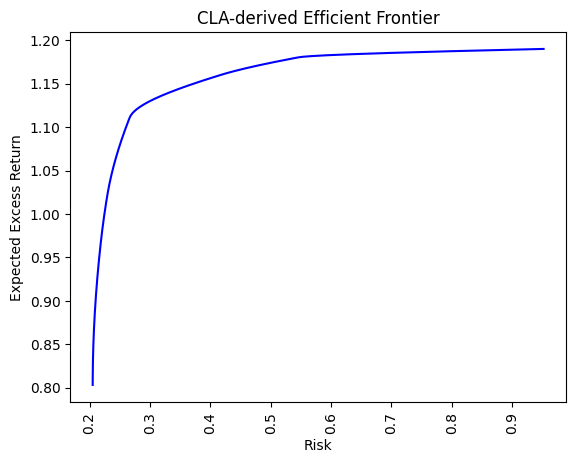

<Figure size 640x480 with 0 Axes>

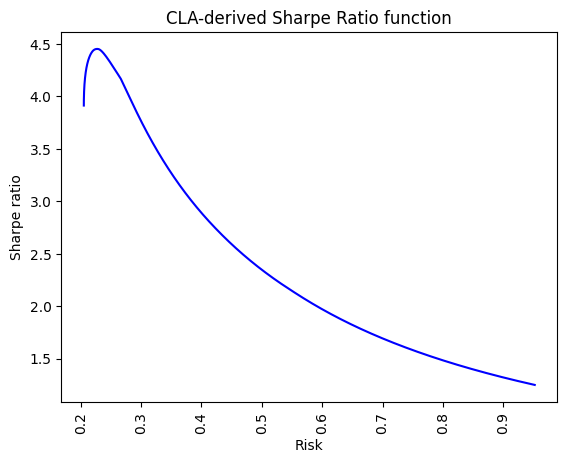

<Figure size 640x480 with 0 Axes>

In [5]:
def compute_sharpe_ratio(a, w0, w1, mean, cov):
    w = a * w0 + (1 - a) * w1
    mean = (w.T @ mean).item()
    std = np.sqrt(w.T @ cov @ w).item()
    return mean / std if std > 0 else -np.inf

x,y,z,w_=[],[],[],[]
for i in range(len(cla.weights)-1):
    w0=np.copy(cla.weights[i])
    w1=np.copy(cla.weights[i+1])
    for a in np.linspace(1,0,10000):
        w=a*w0+(1-a)*w1
        w_.append(w)
        x.append(np.dot(np.dot(w.T,cla.cov),w)[0,0]**.5)
        y.append(np.dot(w.T,cla.mean)[0,0])
        z.append(compute_sharpe_ratio(a,w0,w1,cla.mean,cla.cov))
plot2D(x,y,'Risk','Expected Excess Return','CLA-derived Efficient Frontier')
plot2D(x,z,'Risk','Sharpe ratio','CLA-derived Sharpe Ratio function')